<a href="https://colab.research.google.com/github/lachisholm/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying MNIST handwritten digits with softmax regression**

***Install and Import Libraries***

In [1]:
!pip install tensorflow -q

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

***Load and Preprocess MNIST Dataset***

In [2]:
# MNIST dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data to [0,1] range and flatten
x_train = x_train.reshape(-1, 784).astype('float32') /255.0
x_test = x_test.reshape(-1, 784).astype('float32')/255.0

# One-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


***Build Model***

In [4]:
# Define the medol

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model = tf.keras.Sequential([
    Input(shape=(784,)),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')


])


# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

***Train the Model***

In [5]:
# Train

NUM_EPOCHS = 35
BATCH_SIZE = 500

history = model.fit(
    x_train, y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test)
)

Epoch 1/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6156 - loss: 1.2358 - val_accuracy: 0.9260 - val_loss: 0.2541
Epoch 2/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9105 - loss: 0.3134 - val_accuracy: 0.9463 - val_loss: 0.1795
Epoch 3/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9337 - loss: 0.2241 - val_accuracy: 0.9564 - val_loss: 0.1426
Epoch 4/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9462 - loss: 0.1837 - val_accuracy: 0.9607 - val_loss: 0.1252
Epoch 5/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9548 - loss: 0.1544 - val_accuracy: 0.9663 - val_loss: 0.1101
Epoch 6/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9602 - loss: 0.1356 - val_accuracy: 0.9689 - val_loss: 0.1046
Epoch 7/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9646 - loss: 0.1209 - val_accuracy: 0.9709 - val_loss: 0.0931
Epoch 8/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9687 - loss: 0.1048 - val_accu

***Evaluate the Model***

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: [test_accuracy * 100:.2f]%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0890
Test Accuracy: [test_accuracy * 100:.2f]%


***Visualizing Training and Validation Accuracy***

***import matplotlib.pyplot as plt***

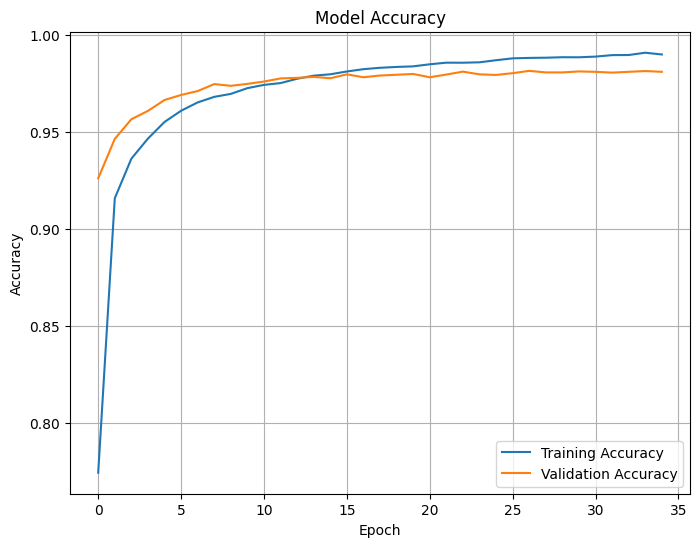

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

***Visualizing Training and Validation Loss***

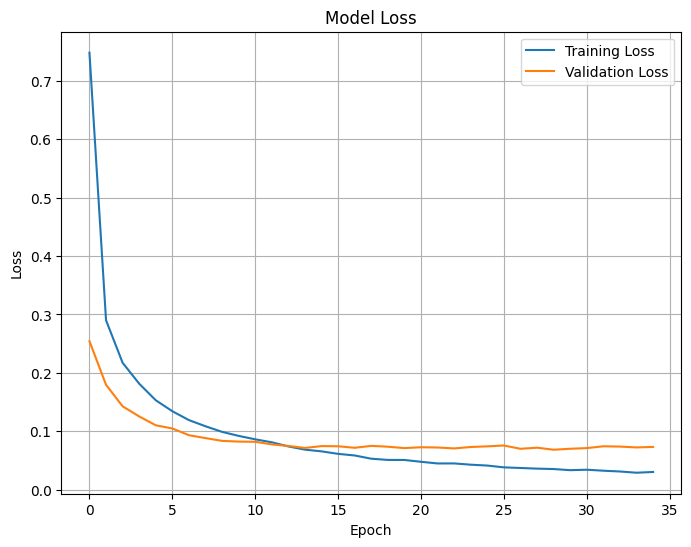

In [13]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

***Save the Model***

In [ ]:
# Save

model.save('mnist_model.h5')
print("Model saved successfully")

***load the Model Later***

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model
print("Model loaded")

***Make Predictions***

In [ ]:
predictions = model.predict(x_test)

import numpy as np
predicted_label = pm.argmax(predictions[0])
true_label = np.argmax(y_test[0])

print(f"Predicted Label: {predicted_label}, True Label: [true_label}"]")